# TASK 1

### Task 1a
\begin{align*}
\theta_{MLE} &= argmax_{\theta} p(X/\theta)\\
&= arg\max_{\theta} \prod_{n} P(t_n| x_n; \theta) \\
&= arg\max_{\theta}\> log(\prod_{n} P(t_n| x_n; \theta)) \\
&= arg\max_{\theta}\> \sum_{n} log(P(t_n| x_n; \theta)) \\
&= arg\max_{\theta}\> \sum_{n}\sum_{m} t_{n,m} log(P(t_n| x_n; \theta)) \\
&= arg\max_{\theta}\> \sum_{n} log(\prod_{m} (P(t_n| x_n; \theta))^{t_{n,m}} \\
&= arg\max_{\theta}\> log( \prod_{n} \prod_{m} (P(t_n| x_n; \theta))^{t_{n,m}} \\
&= - arg\min_{\theta}\> log( \prod_{n} \prod_{m} (P(t_n| x_n; \theta))^{t_{n,m}} \\
\end{align*}

### Task 1b
\begin{align*}
\theta_{MAP} &= argmax_{\theta} p(X/\theta) p(\theta)\\
&= arg\max_{\theta} \prod_{n} P(t_n| x_n; \theta) p(\theta) \\
&= arg\max_{\theta}\> log(\prod_{n} P(t_n| x_n; \theta) p(\theta))\\
&= arg\max_{\theta}\> \sum_{n} log(P(t_n| x_n; \theta)) + log(p(\theta))\\
&= arg\max_{\theta}\> \sum_{n}\sum_{m} t_{n,m} log(P(t_n| x_n; \theta)) + log(p(\theta))\\
&= arg\max_{\theta}\> \sum_{n}\sum_{m} t_{n,m} log(P(t_n| x_n; \theta)) + \sum_{n}\sum_{m} t_{n,m} log(p(\theta))\\
&= arg\max_{\theta}\> \sum_{n} (log(\prod_{m} P(t_n| x_n; \theta)))^{t_{n,m}} + \sum_{n} log(\prod_{m}p(\theta))^{t_{m,n} } \\
&= arg\max_{\theta}\> (log(\prod_{n} \prod_{m} P(t_n| x_n; \theta)))^{t_{n,m}} + log(\prod_{n} \prod_{m}p(\theta))^{t_{m,n} } \\
&= arg\max_{\theta}\> (log(\prod_{n} \prod_{m} P(t_n| x_n; \theta)))^{t_{n,m}} + const * ||\theta||^{2} \\
\end{align*}
Because, \\
\begin{align*}
P(\theta) &= \frac{1}{\sqrt{2\pi\alpha^2}} e^-(\frac{\theta-0}{2\alpha^2})\\
log(P(\theta)) &= const. + log\>e^-({\frac{1}{2\alpha}\theta^2}) \\
&= const. - \frac{1}{2\alpha}\theta^2
\end{align*}

## TASK 2A

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
def collect1000(x_data,y_data):
    samples_x, samples_y = list(), list()
    count_arr = np.ones(10)*100
    for (image, label) in zip(x_data, y_data):
        if count_arr[label] > 0:
            samples_x.append(image)
            samples_y.append(label)
            count_arr[label] -= 1
        else:
            if np.sum(count_arr) == 0:
                samples_x = np.stack(samples_x)
                samples_y = np.stack(samples_y)
                return samples_x, samples_y
        


In [0]:
def weights_difference(model):
    total_sum = 0
    for layer in model.layers:
        total_sum += np.sum(layer.get_weights()[0])
        total_sum += np.sum(layer.get_weights()[1])
    return total_sum

In [0]:
train_x, train_y = collect1000(x_train, y_train)
test_x, test_y = collect1000(x_test, y_test)

train_x = (train_x.reshape(1000,784))/255
test_x = (test_x.reshape(1000,784))/255

train_y = keras.utils.to_categorical(train_y)
test_y = keras.utils.to_categorical(test_y)

In [0]:
model = Sequential()
model.add(Dense(784))
model.add(Dense(30,activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics = ["accuracy"])

In [7]:
history = list()
weight_diff = list()

for epoch in range(0,30):    
    history.append(model.fit(train_x, train_y, batch_size=10, epochs=1 ,validation_data=(test_x, test_y)))
    weight_diff.append(weights_difference(model))

Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 1.3416 - accuracy: 0.6840 - val_loss: 1.0772 - val_accuracy: 0.7710
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 0.7753 - accuracy: 0.8770 - val_loss: 0.8568 - val_accuracy: 0.8070
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5752 - accuracy: 0.9210 - val_loss: 0.7521 - val_accuracy: 0.8190
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4396 - accuracy: 0.9430 - val_loss: 0.6833 - val_accuracy: 0.8170
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3478 - accuracy: 0.9600 - val_loss: 0.6402 - val_accuracy: 0.8310
Train on 1000 samples, validate on 1000 sampl

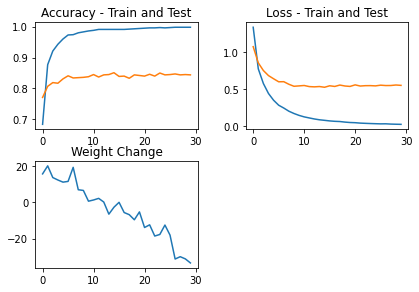

In [8]:
fig, axs = plt.subplots(2,2)
fig.tight_layout()
axs[0,0].plot([(i.history["accuracy"]) for i in history])
axs[0,0].plot([(i.history["val_accuracy"]) for i in history])
axs[0,0].title.set_text("Accuracy - Train and Test")

axs[0, 1].plot([(i.history["loss"]) for i in history], label="Train")
axs[0, 1].plot([(i.history["val_loss"]) for i in history], label="Test")
axs[0, 1].title.set_text("Loss - Train and Test")


axs[1, 0].plot(weight_diff)
axs[1, 0].title.set_text("Weight Change")

axs[1,1].remove()

## TASK 2B

### 1 hidden layer with reg



In [9]:
model = Sequential()
model.add(Dense(784))
model.add(Dense(30,activation="sigmoid", kernel_regularizer=keras.regularizers.l2(5)) )
model.add(Dense(10, activation="softmax", kernel_regularizer=keras.regularizers.l2(5)))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics = ["accuracy"])

history = list()
weight_diff = list()

for epoch in range(0,30):    
    history.append(model.fit(train_x, train_y, batch_size=10, epochs=1 ,validation_data=(test_x, test_y)))
    weight_diff.append(weights_difference(model))


Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 121.6804 - accuracy: 0.4500 - val_loss: 34.6351 - val_accuracy: 0.1860
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 22.9907 - accuracy: 0.1440 - val_loss: 14.8673 - val_accuracy: 0.1430
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 10.4717 - accuracy: 0.1390 - val_loss: 7.1180 - val_accuracy: 0.1810
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 5.3270 - accuracy: 0.2070 - val_loss: 3.9942 - val_accuracy: 0.2500
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 3.3237 - accuracy: 0.1840 - val_loss: 2.8402 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1000

**************1 hidden layer with Regularization**************


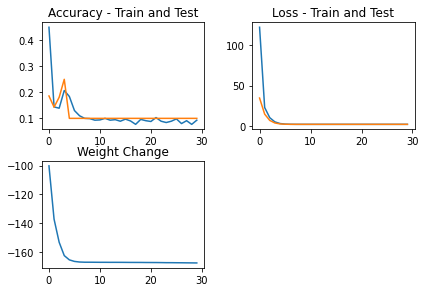

In [10]:
fig, axs = plt.subplots(2,2)
print("**************1 hidden layer with Regularization**************")
fig.tight_layout()
axs[0,0].plot([(i.history["accuracy"]) for i in history])
axs[0,0].plot([(i.history["val_accuracy"]) for i in history])
axs[0,0].title.set_text("Accuracy - Train and Test")

axs[0, 1].plot([(i.history["loss"]) for i in history], label="Train")
axs[0, 1].plot([(i.history["val_loss"]) for i in history], label="Test")
axs[0, 1].title.set_text("Loss - Train and Test")


axs[1, 0].plot(weight_diff)
axs[1, 0].title.set_text("Weight Change")

axs[1,1].remove()

### 2 Hidden Layers without reg

In [11]:
model = Sequential()
model.add(Dense(784))
model.add(Dense(30,activation="sigmoid"))
model.add(Dense(30,activation="sigmoid"))
model.add(Dense(10, activation="softmax"))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics = ["accuracy"])

history = list()
weight_diff = list()

for epoch in range(0,30):    
    history.append(model.fit(train_x, train_y, batch_size=10, epochs=1 ,validation_data=(test_x, test_y)))
    weight_diff.append(weights_difference(model))


Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 2.0569 - accuracy: 0.4150 - val_loss: 1.8512 - val_accuracy: 0.6490
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 1.6790 - accuracy: 0.7760 - val_loss: 1.6326 - val_accuracy: 0.6900
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 1.4039 - accuracy: 0.8280 - val_loss: 1.3899 - val_accuracy: 0.7530
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 1.1589 - accuracy: 0.8700 - val_loss: 1.2197 - val_accuracy: 0.7850
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 0.9478 - accuracy: 0.8870 - val_loss: 1.0625 - val_accuracy: 0.7890
Train on 1000 samples, validate on 1000 sampl

*****************2 hidden layer without Regularization*****************


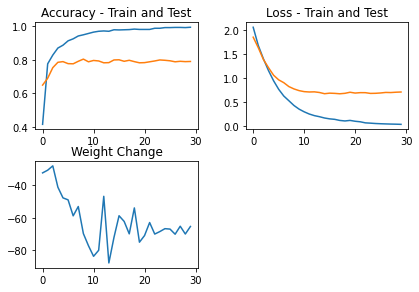

In [12]:
fig, axs = plt.subplots(2,2)
print("*****************2 hidden layer without Regularization*****************")
fig.tight_layout()
axs[0,0].plot([(i.history["accuracy"]) for i in history])
axs[0,0].plot([(i.history["val_accuracy"]) for i in history])
axs[0,0].title.set_text("Accuracy - Train and Test")

axs[0, 1].plot([(i.history["loss"]) for i in history], label="Train")
axs[0, 1].plot([(i.history["val_loss"]) for i in history], label="Test")
axs[0, 1].title.set_text("Loss - Train and Test")


axs[1, 0].plot(weight_diff)
axs[1, 0].title.set_text("Weight Change")

axs[1,1].remove()

In [13]:
model = Sequential()
model.add(Dense(784))
model.add(Dense(30,activation="sigmoid", kernel_regularizer=keras.regularizers.l2(5)) )
model.add(Dense(30,activation="sigmoid", kernel_regularizer=keras.regularizers.l2(5)) )
model.add(Dense(10, activation="softmax", kernel_regularizer=keras.regularizers.l2(5)))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics = ["accuracy"])

history = list()
weight_diff = list()

for epoch in range(0,30):    
    history.append(model.fit(train_x, train_y, batch_size=10, epochs=1 ,validation_data=(test_x, test_y)))
    weight_diff.append(weights_difference(model))

Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 218.6302 - accuracy: 0.1000 - val_loss: 90.8654 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 57.4736 - accuracy: 0.1000 - val_loss: 33.3939 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 21.2804 - accuracy: 0.1000 - val_loss: 12.4812 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 8.2835 - accuracy: 0.1100 - val_loss: 5.3314 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 4.0184 - accuracy: 0.0950 - val_loss: 3.1236 - val_accuracy: 0.1000
Train on 1000 samples, validate on 100

*****************2 hidden layer with Regularization*****************


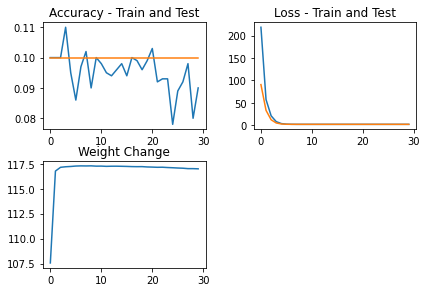

In [14]:
fig, axs = plt.subplots(2,2)
print("*****************2 hidden layer with Regularization*****************")
fig.tight_layout()
axs[0,0].plot([(i.history["accuracy"]) for i in history])
axs[0,0].plot([(i.history["val_accuracy"]) for i in history])
axs[0,0].title.set_text("Accuracy - Train and Test")

axs[0, 1].plot([(i.history["loss"]) for i in history], label="Train")
axs[0, 1].plot([(i.history["val_loss"]) for i in history], label="Test")
axs[0, 1].title.set_text("Loss - Train and Test")


axs[1, 0].plot(weight_diff)
axs[1, 0].title.set_text("Weight Change")

axs[1,1].remove()


### 3 Hidden Layers without reg

In [15]:
model = Sequential()
model.add(Dense(784))
model.add(Dense(30,activation="sigmoid"))
model.add(Dense(30,activation="sigmoid"))
model.add(Dense(30,activation="sigmoid"))
model.add(Dense(10, activation="softmax"))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics = ["accuracy"])

history = list()
weight_diff = list()

for epoch in range(0,30):    
    history.append(model.fit(train_x, train_y, batch_size=10, epochs=1 ,validation_data=(test_x, test_y)))
    weight_diff.append(weights_difference(model))


Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 2.3013 - accuracy: 0.1630 - val_loss: 2.1727 - val_accuracy: 0.5020
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 2.0817 - accuracy: 0.5840 - val_loss: 2.0068 - val_accuracy: 0.5790
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 1.8743 - accuracy: 0.6500 - val_loss: 1.8187 - val_accuracy: 0.6800
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 1.6559 - accuracy: 0.7290 - val_loss: 1.6468 - val_accuracy: 0.6700
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 1.4495 - accuracy: 0.8100 - val_loss: 1.4898 - val_accuracy: 0.6920
Train on 1000 samples, validate on 1000 sampl

*****************3 hidden layer without Regularization*****************


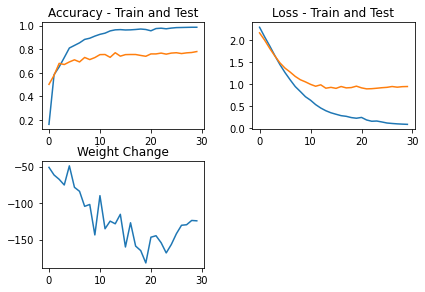

In [16]:
fig, axs = plt.subplots(2,2)
print("*****************3 hidden layer without Regularization*****************")
fig.tight_layout()
axs[0,0].plot([(i.history["accuracy"]) for i in history])
axs[0,0].plot([(i.history["val_accuracy"]) for i in history])
axs[0,0].title.set_text("Accuracy - Train and Test")

axs[0, 1].plot([(i.history["loss"]) for i in history], label="Train")
axs[0, 1].plot([(i.history["val_loss"]) for i in history], label="Test")
axs[0, 1].title.set_text("Loss - Train and Test")


axs[1, 0].plot(weight_diff)
axs[1, 0].title.set_text("Weight Change")

axs[1,1].remove()


### 3 Hidden layers with reg

In [17]:
model = Sequential()
model.add(Dense(784))
model.add(Dense(30,activation="sigmoid", kernel_regularizer=keras.regularizers.l2(5)) )
model.add(Dense(30,activation="sigmoid", kernel_regularizer=keras.regularizers.l2(5)) )
model.add(Dense(30,activation="sigmoid", kernel_regularizer=keras.regularizers.l2(5)) )
model.add(Dense(10, activation="softmax", kernel_regularizer=keras.regularizers.l2(5)))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics = ["accuracy"])

history = list()
weight_diff = list()

for epoch in range(0,30):    
    history.append(model.fit(train_x, train_y, batch_size=10, epochs=1 ,validation_data=(test_x, test_y)))
    weight_diff.append(weights_difference(model))

Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 312.8098 - accuracy: 0.1000 - val_loss: 142.6339 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 88.8315 - accuracy: 0.1000 - val_loss: 49.9396 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 30.8113 - accuracy: 0.1000 - val_loss: 17.1197 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 10.8131 - accuracy: 0.0990 - val_loss: 6.4591 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 4.6013 - accuracy: 0.1000 - val_loss: 3.3621 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1

*****************3 hidden layer with Regularization*****************


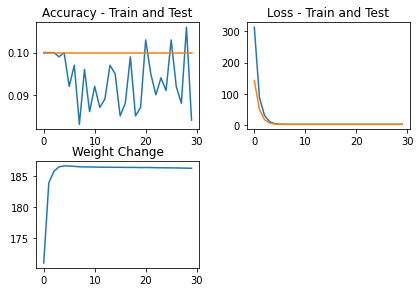

In [18]:
fig, axs = plt.subplots(2,2)
print("*****************3 hidden layer with Regularization*****************")
fig.tight_layout()
axs[0,0].plot([(i.history["accuracy"]) for i in history])
axs[0,0].plot([(i.history["val_accuracy"]) for i in history])
axs[0,0].title.set_text("Accuracy - Train and Test")

axs[0, 1].plot([(i.history["loss"]) for i in history], label="Train")
axs[0, 1].plot([(i.history["val_loss"]) for i in history], label="Test")
axs[0, 1].title.set_text("Loss - Train and Test")


axs[1, 0].plot(weight_diff)
axs[1, 0].title.set_text("Weight Change")

axs[1,1].remove()


# TASK 2C

In [0]:
model = Sequential()

model.add(Conv2D(30, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)))
model.add(Dropout(0.2))
# model.add(Conv2D(20, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(10, kernel_size=(3,3), activation="relu"))
model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(30,activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics = ["accuracy"])

In [0]:
import random
import cv2
def img_op(data):
    points = [np.float32([[1,0,0],[0,1,3]]),
            np.float32([[1,0,0],[0,1,-3]]),
            np.float32([[1,0,3],[0,1,0]]),
            np.float32([[1,0,-3],[0,1,3]]),
            np.float32([[1,0,3],[0,1,3]]),
            np.float32([[1,0,3],[0,1,-3]]),
            np.float32([[1,0,-3],[0,1,3]]),
            np.float32([[1,0,-3],[0,1,-3]])  
    ]
    angles = [1, 2, 3, 360-1, 360-2, 360-3]

    for i in range(1000):
        img = data[i]
        img = img.reshape(28,28)
        point = random.sample(points,1)[0]
        angle = random.sample(angles,1)[0]

        img = cv2.warpAffine(img, point, (28,28))
        rotation = cv2.getRotationMatrix2D((14,14), angle, 1.0)
        img = cv2.warpAffine(img, rotation, (28,28))
        img = img.reshape(28,28,1)
        data[i] = img
    return data

In [0]:
train_x, train_y = collect1000(x_train, y_train)
test_x, test_y = collect1000(x_test, y_test)

train_y = keras.utils.to_categorical(train_y)
test_y = keras.utils.to_categorical(test_y)

train_x = train_x.reshape(1000,28,28,1)/255
test_x = test_x.reshape(1000,28,28,1)/255

train_x = img_op(train_x)
test_x = img_op(test_x)

In [26]:
history = list()
weight_diff = list()

for epoch in range(0,30):    
    history.append(model.fit(train_x, train_y, batch_size=10, epochs=1 ,validation_data=(test_x, test_y)))

Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 4s 4ms/step - loss: 2.0382 - accuracy: 0.2950 - val_loss: 1.7221 - val_accuracy: 0.4380
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 3s 3ms/step - loss: 1.1782 - accuracy: 0.6240 - val_loss: 1.1572 - val_accuracy: 0.6310
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 3s 3ms/step - loss: 0.5403 - accuracy: 0.8300 - val_loss: 0.9882 - val_accuracy: 0.7000
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 3s 3ms/step - loss: 0.2948 - accuracy: 0.9060 - val_loss: 0.9233 - val_accuracy: 0.7330
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1688 - accuracy: 0.9430 - val_loss: 1.0391 - val_accuracy: 0.7150
Train on 1000 samples, validate on 1000 sampl

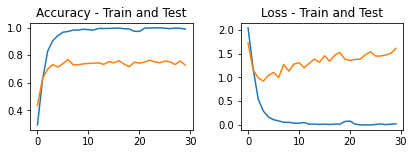

In [27]:
fig, axs = plt.subplots(2,2)
fig.tight_layout()
axs[0,0].plot([(i.history["accuracy"]) for i in history])
axs[0,0].plot([(i.history["val_accuracy"]) for i in history])
axs[0,0].title.set_text("Accuracy - Train and Test")

axs[0, 1].plot([(i.history["loss"]) for i in history], label="Train")
axs[0, 1].plot([(i.history["val_loss"]) for i in history], label="Test")
axs[0, 1].title.set_text("Loss - Train and Test")

axs[1,0].remove()
axs[1,1].remove()
